# Project: Air pollution clustering

## About the datases:

link to hte dataset at Kaggle: https://www.kaggle.com/adityadeshpande23/pollution-india-2010

This dataset comprises three types of air pollutant in India for specific cities. Additional column is "State". 

Inspiration: derive meaningful insights about the air pollution in India by dividing the data to categories by common properties similarity.

## STEP 1: Learning the dataset and feature engineering

In [1]:
# importing libraries
# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats as stats # for Q-Q plots

# these are the objects to impute missing data
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# importing the dataset
df = pd.read_csv("pollution_india_2010 (1).csv")

In [3]:
# showing the column names
list(df.columns)

['City', 'NO2', 'PM10', 'SO2', 'State']

In [4]:
# reordering the dataframe columns in original order
df = df[['City', 'State', 'NO2', 'PM10', 'SO2']]

In [5]:
# showing first five rows of the dateset
df.head()

,City,State,NO2,PM10,SO2
0,Chitoor,Andhra Pradesh,9,39,4
1,Guntur,Andhra Pradesh,11,81,2
2,Hydrabad,Andhra Pradesh,24,79,5
3,Kothagudem,Andhra Pradesh,11,62,2
4,Kurnool,Andhra Pradesh,9,85,4


In [6]:
# showing statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    181 non-null    object
 1   State   181 non-null    object
 2   NO2     181 non-null    object
 3   PM10    181 non-null    object
 4   SO2     181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [7]:
# converting numerical columns to integer
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')
df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce')

In [8]:
# showing statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    181 non-null    object 
 1   State   181 non-null    object 
 2   NO2     177 non-null    float64
 3   PM10    180 non-null    float64
 4   SO2     176 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.2+ KB


Impute the missing values

In [9]:
# Imputing the missing values with SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(df[['NO2', 'PM10', 'SO2']])

SimpleImputer(strategy='median')

In [10]:
# looking at the learnt medians
imputer.statistics_

array([20. , 89.5,  7.5])

In [11]:
# imputing the values

# NOTE: the data is returned as a numpy array!!!
num_data = imputer.transform(df[['NO2', 'PM10', 'SO2']])

In [12]:
# adding the numerical columns to the data frame
df[['NO2', 'PM10', 'SO2']] = pd.DataFrame(num_data, columns=['NO2', 'PM10', 'SO2'])

Visualize data columns

Explore distribution, skewness, outliers and other statistical properties

Looking at the distributions of the variables to see which imputation to use

In [13]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

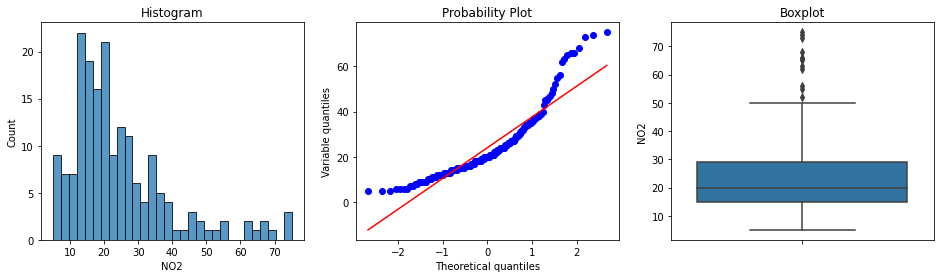

In [14]:
# plotting NO2 variable
diagnostic_plots(df, 'NO2')

The distributions are skewed, thus using median imputation 

In [15]:
# printing skewness
skewness = df["NO2"].skew()
print("skewnessis {:.2f}".format(skewness))

skewnessis 1.55


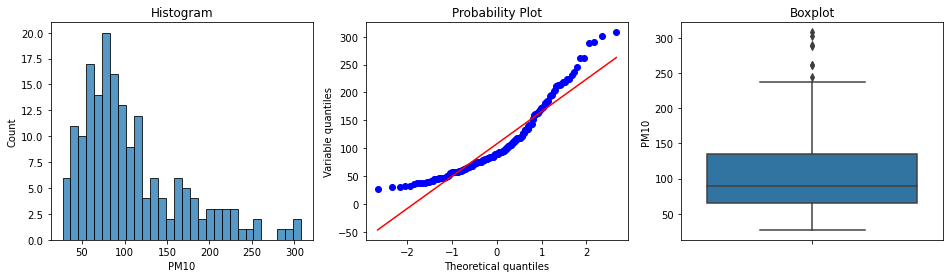

In [16]:
# plotting PM10 variable
diagnostic_plots(df, 'PM10')

In [17]:
# printing skewness
skewness = df["PM10"].skew()
print("skewnessis {:.2f}".format(skewness))

skewnessis 1.20


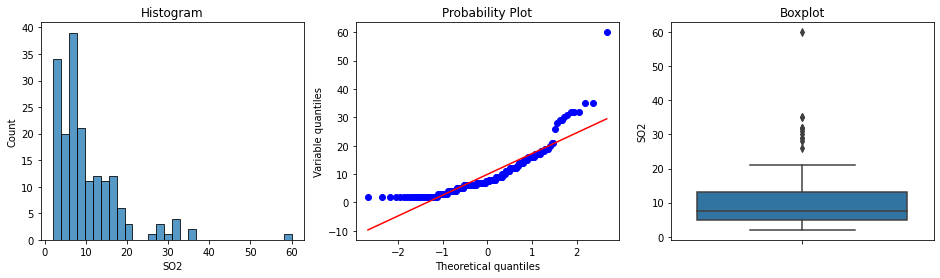

In [18]:
# plotting SO2 variable
diagnostic_plots(df, 'SO2')

In [19]:
# finding the most prominent outlier
df.loc[df["SO2"] > 50]

,City,State,NO2,PM10,SO2
104,Lote,Maharashtra,30.0,119.0,60.0


In [20]:
# replacing SO2 value of the outlier with 35
df["SO2"].replace({60: 35}, inplace=True)

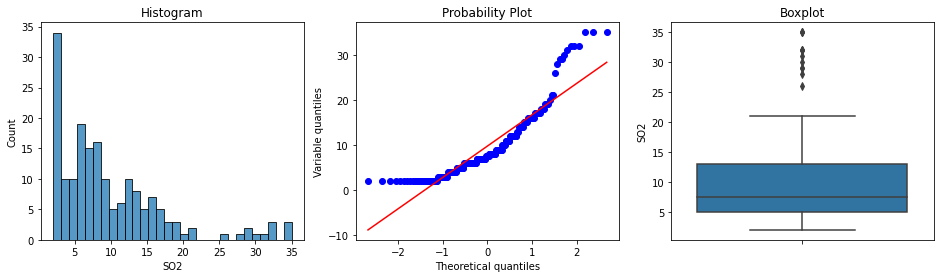

In [21]:
# plotting SO2 variable
diagnostic_plots(df, 'SO2')

In [22]:
# printing skewness
skewness = df["PM10"].skew()
print("skewnessis {:.2f}".format(skewness))

skewnessis 1.20


Proceeding to clustering with original skewness and outliers

# STEP 2: Clustering

## K-means clustering

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


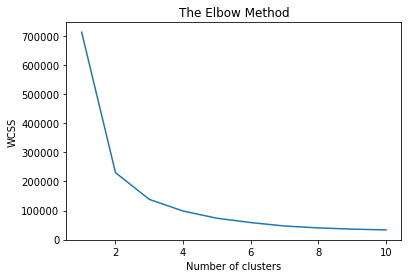

In [23]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
X = df.iloc[:, [2, 3, 4]].values
#X = df[['NO2', 'PM10', 'SO2']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# training the K-Means model on the dataset with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

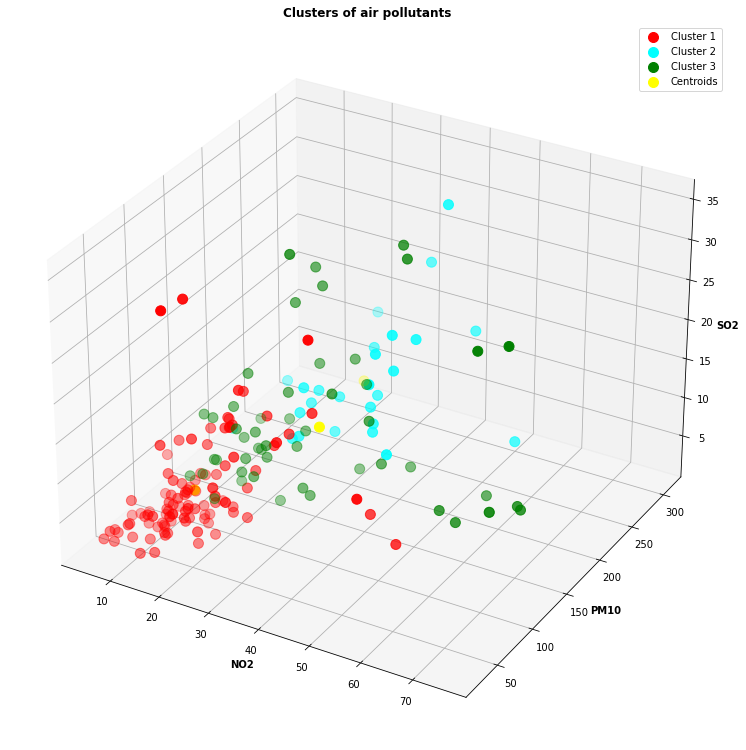

In [25]:
# plotting the 3 clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], X[y_kmeans==0,2], c='red', s=100, label='Cluster 1')
ax.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], X[y_kmeans==1,2], c='cyan', s=100, label='Cluster 2')
ax.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], X[y_kmeans==2,2], c='green', s=100, label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
            c='yellow', s=100, label='Centroids')
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')
plt.legend()

plt.show()

Printing boundaries of the clusters

In [26]:
# clusters boundaries:
for cluster in [0, 1, 2]:
    print("Cluster {:.0f}  'NO2' min and max are {:.1f} and {:.1f}"
          .format(cluster+1, X[y_kmeans==cluster, 0].min(), X[y_kmeans==cluster, 0].max()))
    print("Cluster {:.0f}  'PM10'min and max are {:.1f} and {:.1f}"
          .format(cluster+1, X[y_kmeans==cluster, 1].min(), X[y_kmeans==cluster, 1].max()))
    print("Cluster {:.0f}  'SO2'min and max are {:.1f} and {:.1f} \n"
          .format(cluster+1, X[y_kmeans==cluster, 2].min(), X[y_kmeans==cluster, 2].max()))

Cluster 1  'NO2' min and max are 5.0 and 56.0
Cluster 1  'PM10'min and max are 27.0 and 97.0
Cluster 1  'SO2'min and max are 2.0 and 32.0 

Cluster 2  'NO2' min and max are 6.0 and 55.0
Cluster 2  'PM10'min and max are 181.0 and 308.0
Cluster 2  'SO2'min and max are 3.0 and 30.0 

Cluster 3  'NO2' min and max are 11.0 and 75.0
Cluster 3  'PM10'min and max are 99.0 and 175.0
Cluster 3  'SO2'min and max are 2.0 and 35.0 



Conclusion: The three clusters has different PM10 boundaries, but similar NO2 and SO2 boundaries.

## Hierarchical Clustering

In [27]:
# training the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

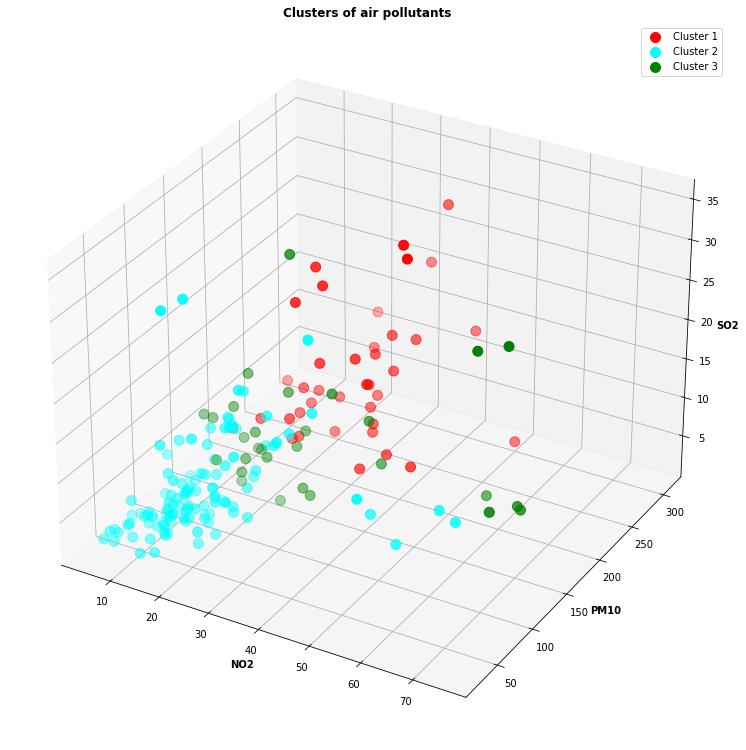

In [28]:
# plotting the 3 clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.scatter(X[y_hc==0,0], X[y_hc==0,1], X[y_hc==0,2], c='red', s=100, label='Cluster 1')
ax.scatter(X[y_hc==1,0], X[y_hc==1,1], X[y_hc==1,2], c='cyan', s=100, label='Cluster 2')
ax.scatter(X[y_hc==2,0], X[y_hc==2,1], X[y_hc==2,2], c='green', s=100, label='Cluster 3')
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')
plt.legend()

plt.show()

In [29]:
# clusters boundaries:
for cluster in [0, 1, 2]:
    print("Cluster {:.0f}  'NO2' min and max are {:.1f} and {:.1f}"
          .format(cluster+1, X[y_hc==cluster, 0].min(), X[y_hc==cluster, 0].max()))
    print("Cluster {:.0f}  'PM10'min and max are {:.1f} and {:.1f}"
          .format(cluster+1, X[y_hc==cluster, 1].min(), X[y_hc==cluster, 1].max()))
    print("Cluster {:.0f}  'SO2'min and max are {:.1f} and {:.1f} \n"
          .format(cluster+1, X[y_hc==cluster, 2].min(), X[y_hc==cluster, 2].max()))

Cluster 1  'NO2' min and max are 6.0 and 55.0
Cluster 1  'PM10'min and max are 152.0 and 308.0
Cluster 1  'SO2'min and max are 3.0 and 35.0 

Cluster 2  'NO2' min and max are 5.0 and 65.0
Cluster 2  'PM10'min and max are 27.0 and 106.0
Cluster 2  'SO2'min and max are 2.0 and 32.0 

Cluster 3  'NO2' min and max are 12.0 and 75.0
Cluster 3  'PM10'min and max are 106.0 and 159.0
Cluster 3  'SO2'min and max are 2.0 and 35.0 



Conclusion: The three clusters has different PM10 boundaries, but similar NO2 and SO2 boundaries

## Affinity Propagation

In [30]:
# importing libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

In [31]:
# defining a model
model = AffinityPropagation(damping=0.9)

In [32]:
# fitting the model
model.fit(X)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


AffinityPropagation(damping=0.9)

In [33]:
# assigning a cluster to each example
y_aff = model.predict(X)

In [34]:
# retrieving unique clusters
clusters = unique(y_aff)

In [35]:
clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

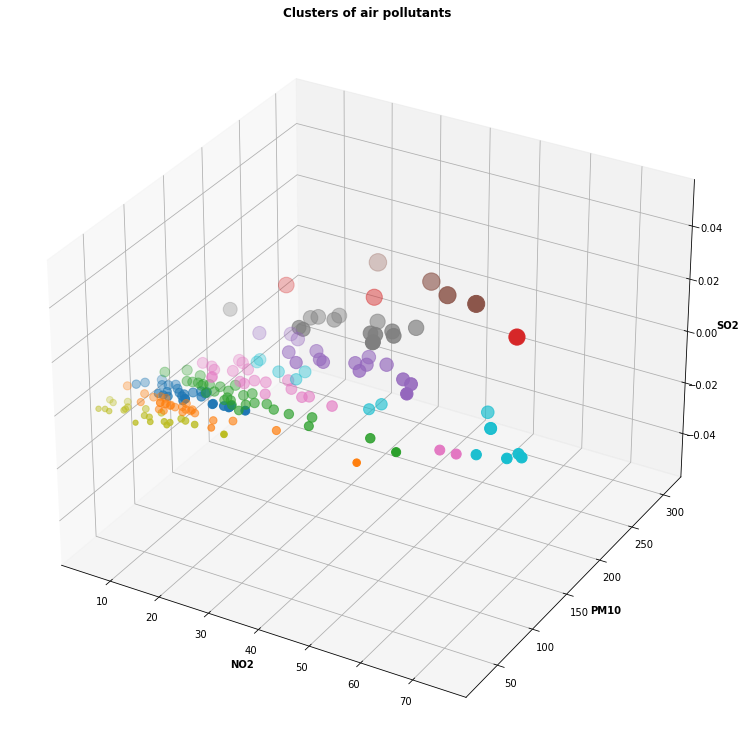

In [36]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_aff == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 1])
    
# defining title and labels and showing the plot
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')

plt.show()

Discussion: affinity propagation clustering algorythm has distinguished between 10 clusters.

## Agglomerative Clustering

In [37]:
# importing libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

In [38]:
# defining a model
model = AgglomerativeClustering(n_clusters=2)

In [39]:
# fitting the model and predict clusters
y_ac = model.fit_predict(X)

In [40]:
# retrieving unique clusters
clusters = unique(y_ac)

In [41]:
clusters

array([0, 1], dtype=int64)

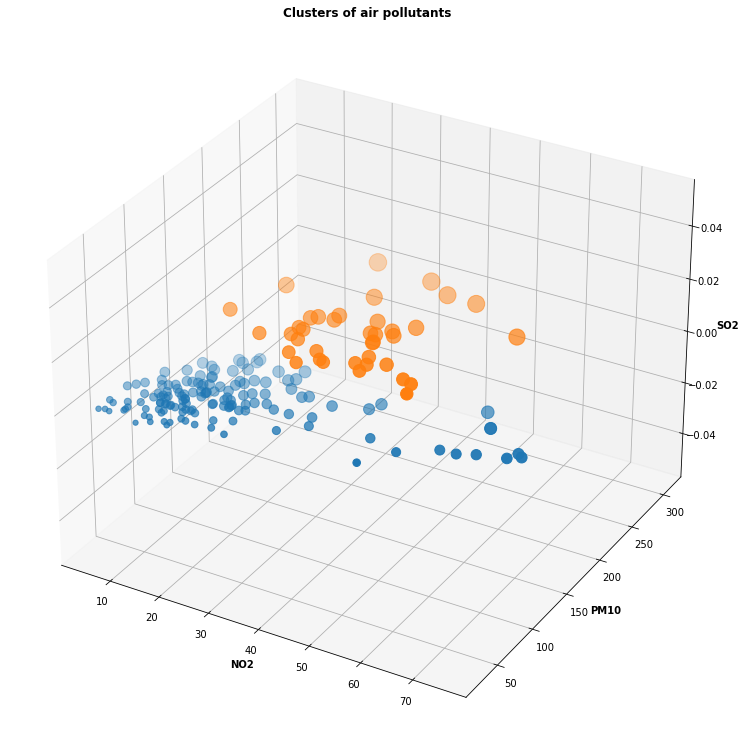

In [42]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_ac == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 1])
    
# defining title and labels and showing the plot
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')

plt.show()

Discussion: agglomerative clustering algorythm has distinguished between 2 clusters.

## BIRCH Clustering (Balanced Iterative Reducing and Clustering using Hierarchies) 

In [43]:
# importing libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

In [44]:
# defining a model
model = Birch()

In [45]:
# fitting the model
model.fit(X)

Birch()

In [46]:
# assigning a cluster to each example
y_birch = model.predict(X)

In [47]:
# retrieve unique clusters
clusters = unique(y_birch)

In [48]:
clusters

array([0, 1, 2], dtype=int64)

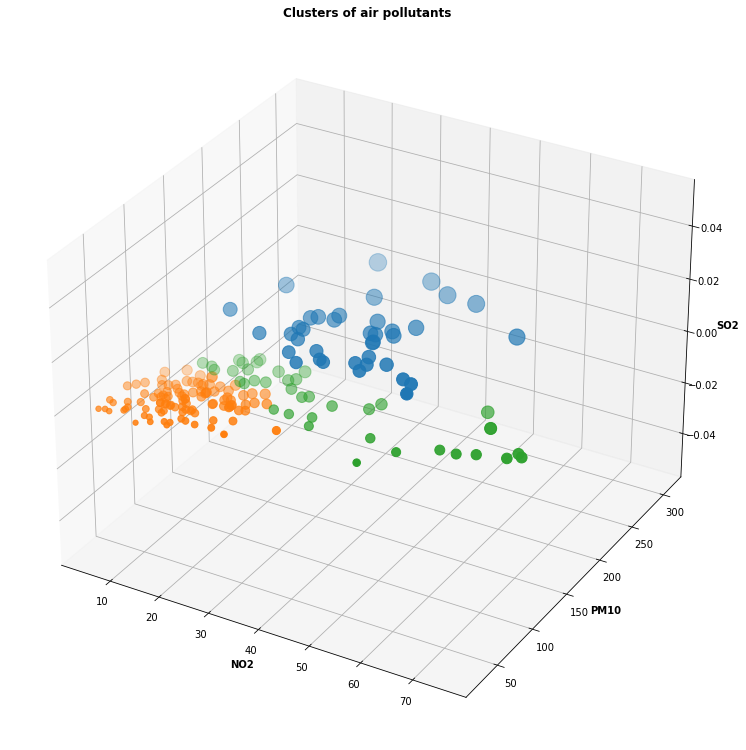

In [49]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_birch == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 1])
    
# defining title and labels and showing the plot
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')

plt.show()

Discussion: BIRCH clustering algorythm has distinguished between 3 clusters. The result resembles k-means elbow optimization.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [50]:
# importing libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

In [51]:
# defining a model
model = DBSCAN(eps=10)

In [52]:
# fitting the model and predicting clusters
y_dbscan = model.fit_predict(X)

In [53]:
# retrieving unique clusters
clusters = unique(y_dbscan)

In [54]:
clusters

array([-1,  0,  1], dtype=int64)

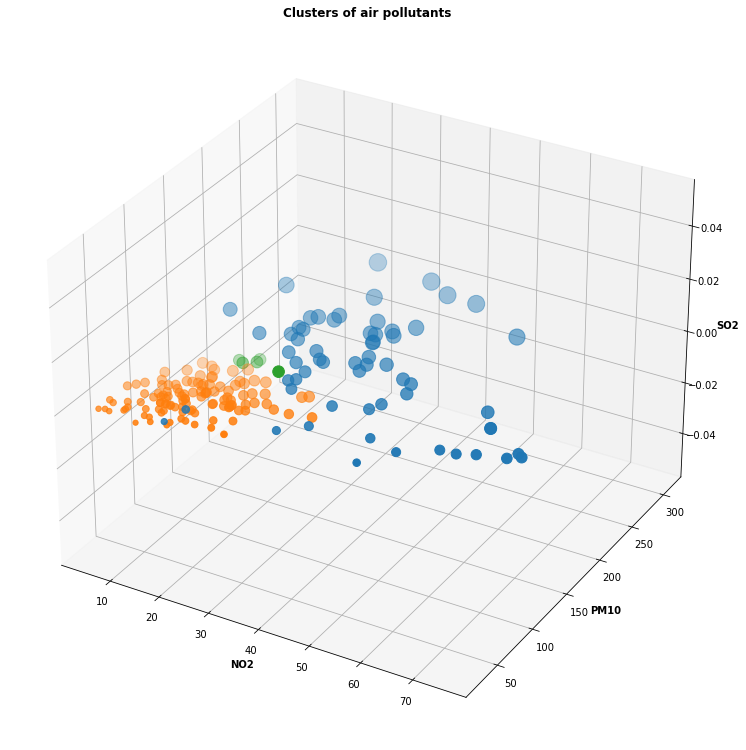

In [55]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_dbscan == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 1])
    
# defining title and labels and showing the plot
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')

plt.show()

Discussion: DBSCAN clustering algorythm divides the dataset in a different way then i.e. k-meand. This can give additional insights.

## K-means clustering w/o defining number of clusters

In [56]:
# importing libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

In [57]:
# defining a model
model = KMeans()

In [58]:
# fitting the model
model.fit(X)

KMeans()

In [59]:
# assigning a cluster to each example
y_km2 = model.predict(X)

In [60]:
# retrieving unique clusters
clusters = unique(y_km2)

In [61]:
clusters

array([0, 1, 2, 3, 4, 5, 6, 7])

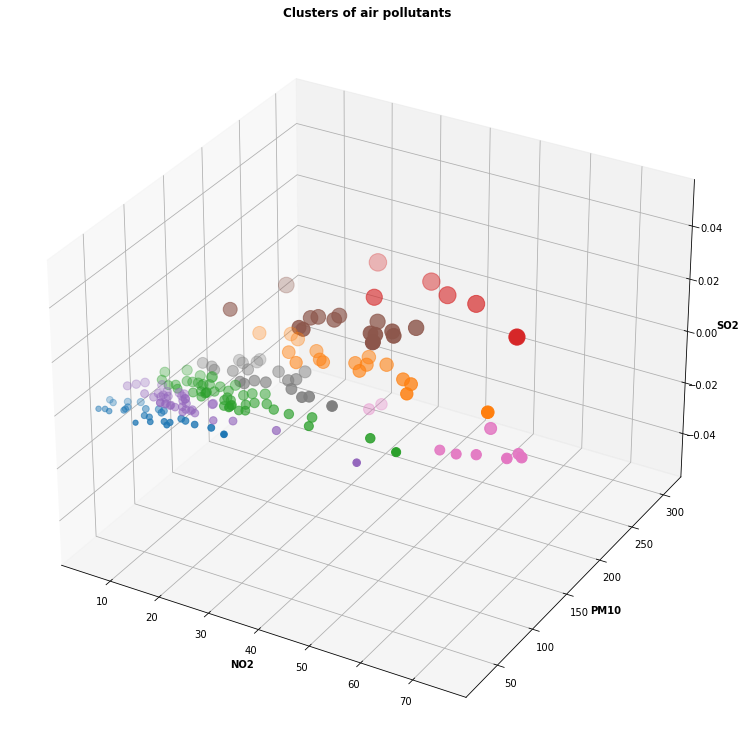

In [62]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_km2 == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 1])
    
# defining title and labels and showing the plot
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')

plt.show()

Discussion: K-mean clustering algorythm has distinguished between 8 clusters.

## Mini-Batch K-Means

In [63]:
# importing libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans

In [64]:
# defining the model
model = MiniBatchKMeans()

In [65]:
# fitting the model
model.fit(X)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans()

In [66]:
# assigning a cluster to each example
y_mbkm = model.predict(X)

In [67]:
# retrieving unique clusters
clusters = unique(y_mbkm)

In [68]:
clusters

array([0, 1, 2, 3, 4, 5, 6, 7])

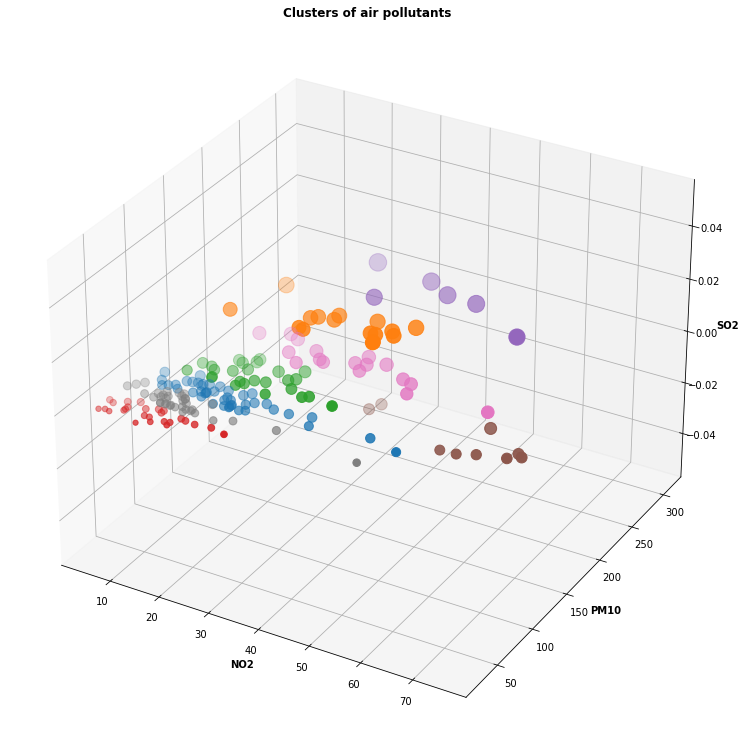

In [69]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_mbkm == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 1])
    
# defining title and labels and showing the plot
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')

plt.show()

Discussion: Mini batch k-mean clustering algorythm has distinguished between 8 clusters. The distribution looks similat to that of k-means.

## Gaussian Mixture Model

In [70]:
# importing libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

In [71]:
# defining a model
model = GaussianMixture(n_components=3) # number of clusters must be defined

In [72]:
# fitting the model
model.fit(X)

GaussianMixture(n_components=3)

In [73]:
# assign a cluster to each example
y_gm = model.predict(X)

In [74]:
# retrieve unique clusters
clusters = unique(y_gm)

In [75]:
clusters

array([0, 1, 2], dtype=int64)

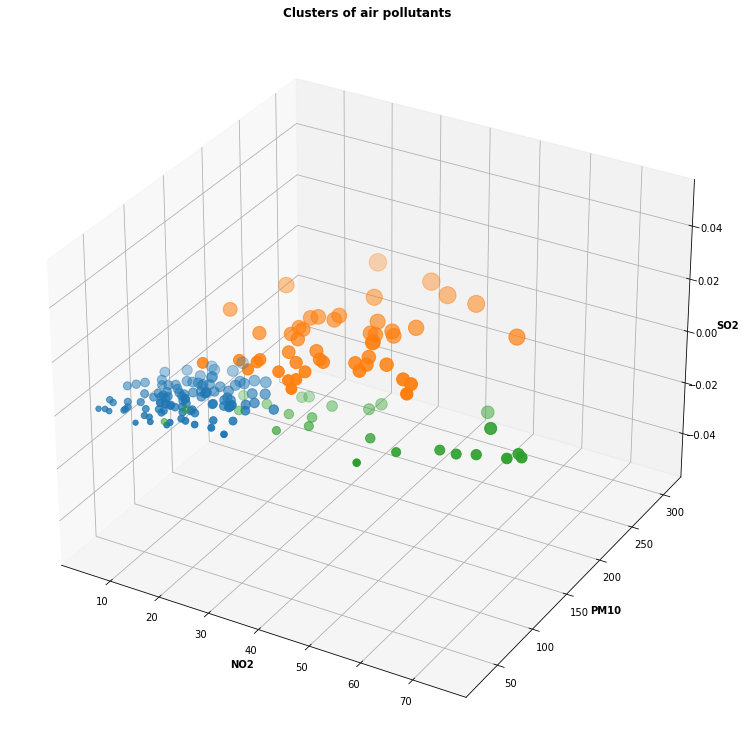

In [76]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_gm == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 1])
    
# defining title and labels and showing the plot
plt.title('Clusters of air pollutants', fontweight='bold')
ax.set_xlabel('NO2', fontweight='bold')
ax.set_ylabel('PM10', fontweight='bold')
ax.set_zlabel('SO2', fontweight='bold')

plt.show()

In [77]:
# clusters boundaries:
for cluster in [0, 1, 2]:
    print("Cluster {:.0f}  'NO2' min and max are {:.1f} and {:.1f}"
          .format(cluster+1, X[y_gm==cluster, 0].min(), X[y_gm==cluster, 0].max()))
    print("Cluster {:.0f}  'PM10'min and max are {:.1f} and {:.1f}"
          .format(cluster+1, X[y_gm==cluster, 1].min(), X[y_gm==cluster, 1].max()))
    print("Cluster {:.0f}  'SO2'min and max are {:.1f} and {:.1f} \n"
          .format(cluster+1, X[y_gm==cluster, 2].min(), X[y_gm==cluster, 2].max()))

Cluster 1  'NO2' min and max are 5.0 and 31.0
Cluster 1  'PM10'min and max are 27.0 and 133.0
Cluster 1  'SO2'min and max are 2.0 and 16.0 

Cluster 2  'NO2' min and max are 6.0 and 55.0
Cluster 2  'PM10'min and max are 119.0 and 308.0
Cluster 2  'SO2'min and max are 2.0 and 35.0 

Cluster 3  'NO2' min and max are 17.0 and 75.0
Cluster 3  'PM10'min and max are 38.0 and 159.0
Cluster 3  'SO2'min and max are 6.0 and 32.0 



Discussion: Gaussian Mixture Model has divided the dataset into three areas that visually can be identified as three diffrent distributions.